<a href="https://colab.research.google.com/github/DanKingsleyAIandML/AI-and-ML-Projects/blob/main/Bank_Personal_Loan_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

# Table of Contents

1.  Importing Libraries
2.  Data overview
3.  Data Preprocessing
4.  Exploratory Data Analysis
      A.Univarate
      B. Multivariate
4. Model Building and Outlier Handling
      A. Interquartile Outlier Handling    
      B. Log Normalization of Skewed Data
      C. GridSearch CV Determined Modeling Parameters
5. Pre-Pruning
6. Cost complexity
7. Analysis of Models
8. Recomendations


## 1. Importing necessary libraries

Loading libraries to read data, split data, data visualization, model building, using GridSearch CV, model tuning, and metric scoring

In [ ]:
#loading libraries to help with reading data, splitting data,data visualization, model building, using GridSearch CV, model tuning, and metric scoring

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


#To use gridsearch CV for tuning and Pre-Pruning different models

from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)


## Loading the dataset

In [ ]:
# mounting drive content
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading data and confirmation of data being read.

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Loan_Modelling.csv')
#copy of data
data = df.copy()
#confirming read
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


## 2. Data Overview

In [ ]:
# shape of the data
data.shape

(5000, 14)

In [ ]:
#data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Statistical Summary of The Data

In [ ]:
#statistical summary of the data
data.describe(include="all")

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#3. Data Preprocessing

Droping 'ID' column as redundant and confirming the dropped column

In [ ]:
data = data.drop('ID', axis=1)

In [ ]:
if 'ID' in data.columns:
    data = data.drop('ID', axis=1)
else:
    print("The 'ID' column does not exist in the data frame.")

The 'ID' column does not exist in the data frame.


Coverting data types to appropriately numerical or categorical data types and reducing the number od Zip codes to a workable number of categories.

In [ ]:
data["Education"].replace([1, 2, 3], ["Undergraduate", "Graduate", "Professional"], inplace=True)

In [ ]:
data["Experience"].replace([-1, -2, -3], [1, 2, 3], inplace=True)

In [ ]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

In [ ]:
#making zip code categorical
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
#reducung zip codes to 7 unigue categories
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")



Number of unique values if we take first two digits of ZIPCode:  7


Converting category to category data type and confirming the data types

In [ ]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

Confirming changed data types

In [ ]:
#confirming changed data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


## 4. Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

Creating Histograms and Barplots

In [ ]:

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:

# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

4. A. Univariate Data Visualization

Age

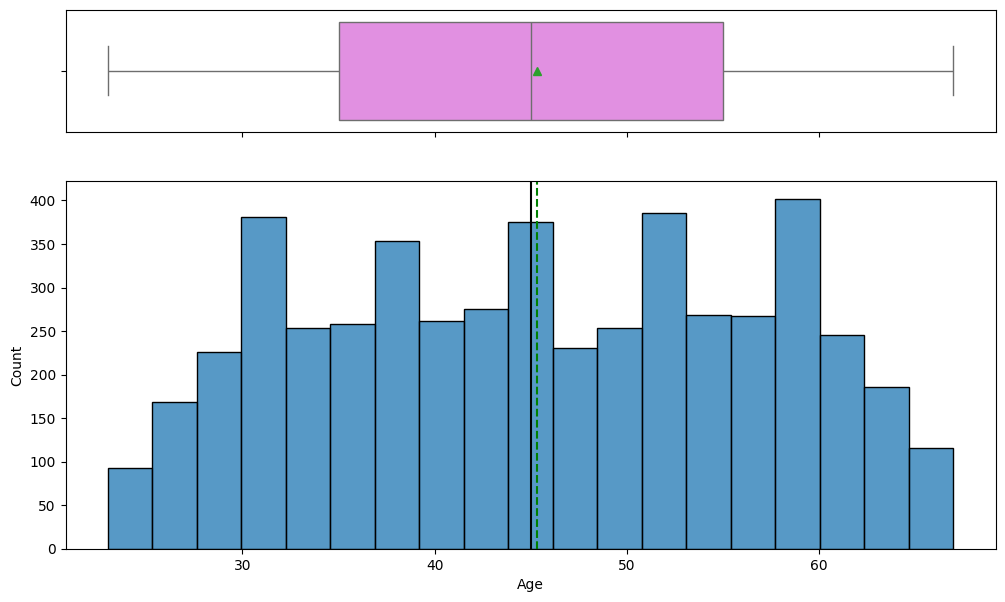

In [ ]:
histogram_boxplot(data, "Age")

Income

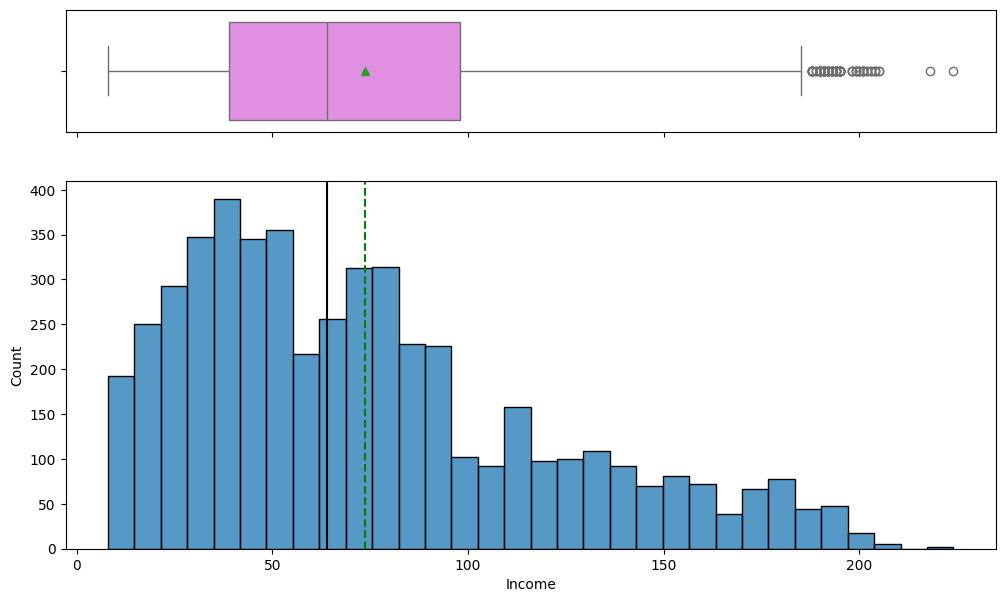

In [ ]:
histogram_boxplot(data, "Income")

Zip Code

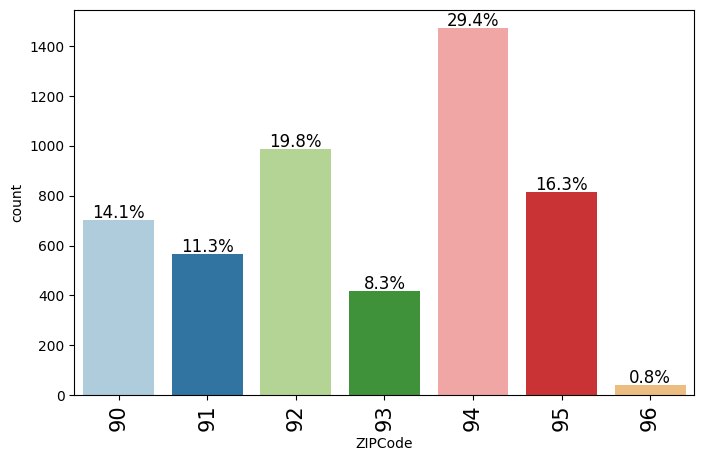

In [ ]:
labeled_barplot(data, "ZIPCode", perc=True)

Experience

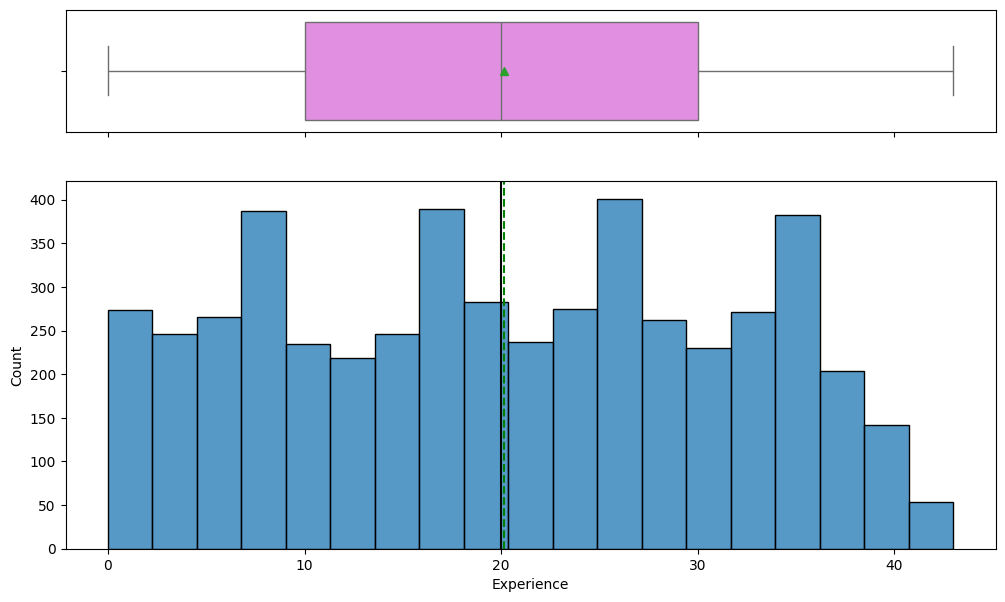

In [ ]:
histogram_boxplot(data, "Experience")

Family

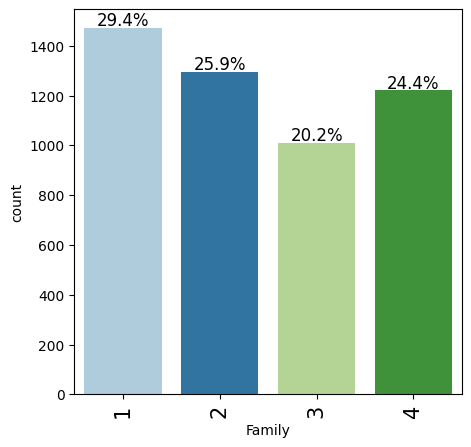

In [ ]:
labeled_barplot(data, "Family", perc=True)

Credit Card Average

Almost one hundred percent of customershave credit cards, for the mostpart the customers with credit cards have lower balances

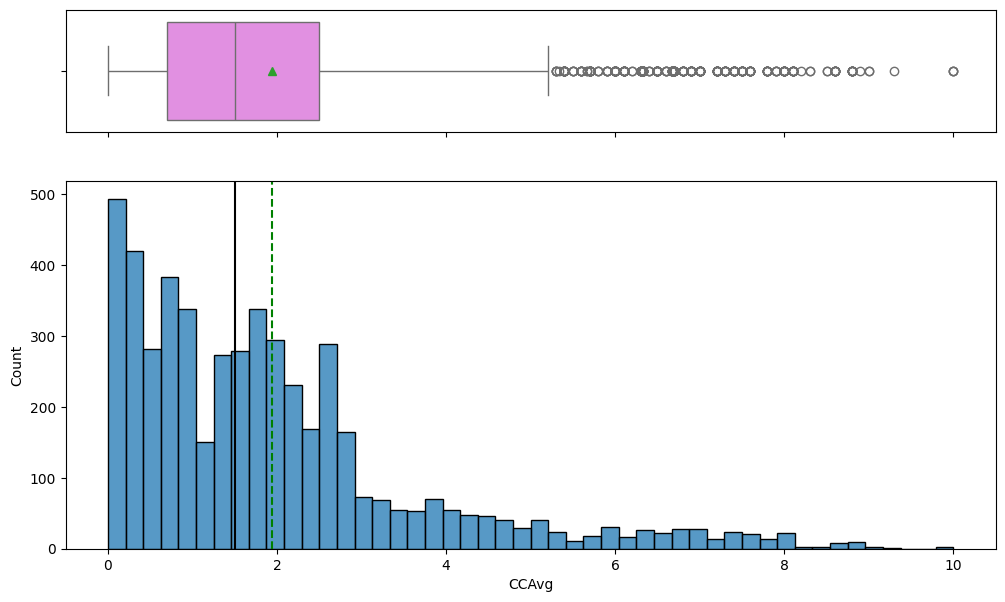

In [ ]:
histogram_boxplot(data,"CCAvg")


Education

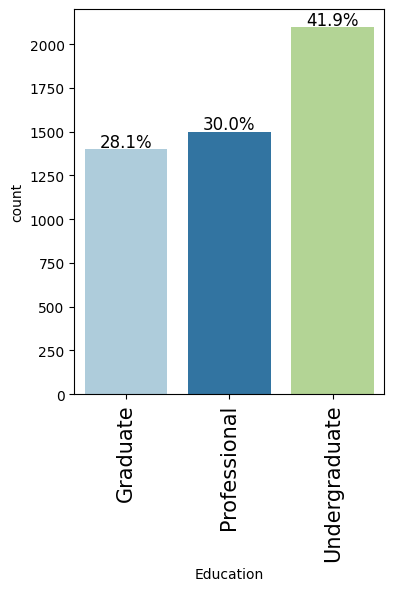

In [ ]:
labeled_barplot(data, "Education", perc=True)

Mortgage

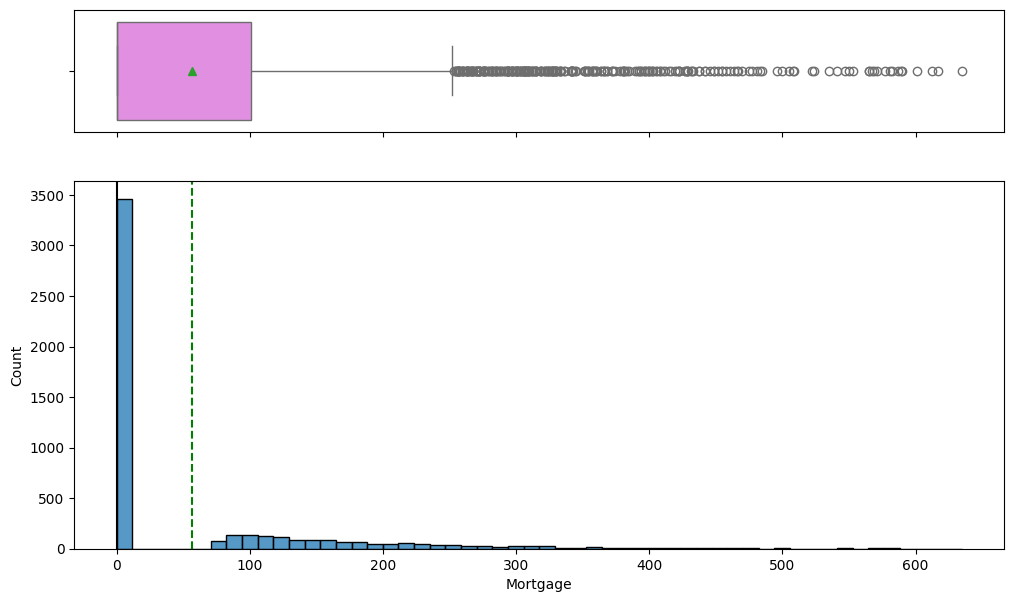

In [ ]:
histogram_boxplot(data, "Mortgage")

Securities Account

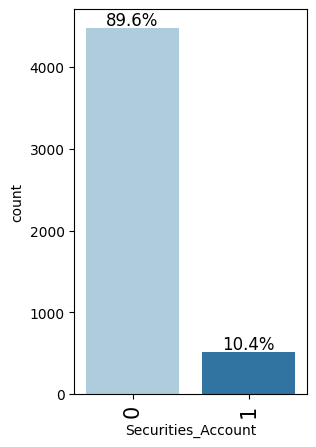

In [ ]:
labeled_barplot(data, "Securities_Account", perc=True)

CD Account

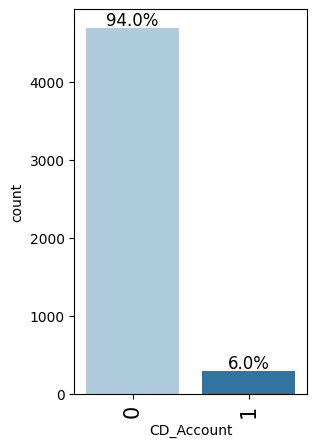

In [ ]:
labeled_barplot(data, "CD_Account", perc=True)

Online

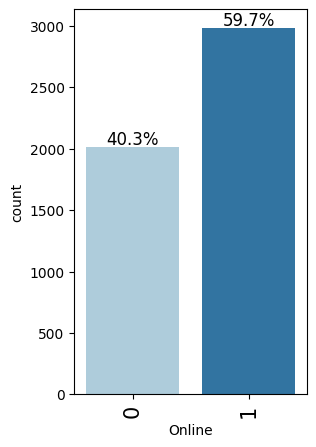

In [ ]:
labeled_barplot(data, "Online", perc=True)

Credit Card

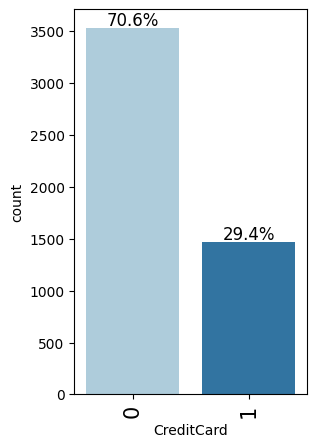

In [ ]:
labeled_barplot(data, "CreditCard", perc=True)

# **`4. B. Bivariate`** **`Analysis`**


In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Correlation of Factors Map

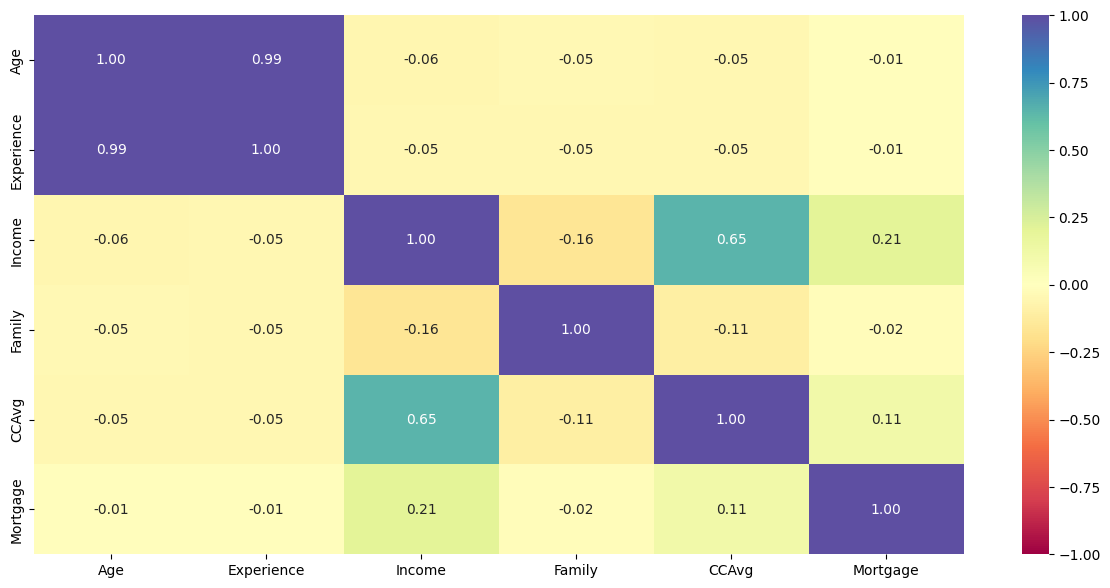

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

Personal Loan vs Experience

Personal_Loan     0    1   All
Experience                    
All            4520  480  5000
9               127   20   147
8               101   18   119
3               116   17   133
20              131   17   148
12               86   16   102
5               132   14   146
32              140   14   154
26              120   14   134
25              128   14   142
19              121   14   135
16              114   13   127
37              103   13   116
35              130   13   143
30              113   13   126
23              131   13   144
22              111   13   124
11              103   13   116
31               92   12   104
36              102   12   114
6               107   12   119
18              125   12   137
7               109   12   121
29              112   12   124
28              127   11   138
17              114   11   125
13              106   11   117
21              102   11   113
39               75   10    85
34              115   10   125
27      

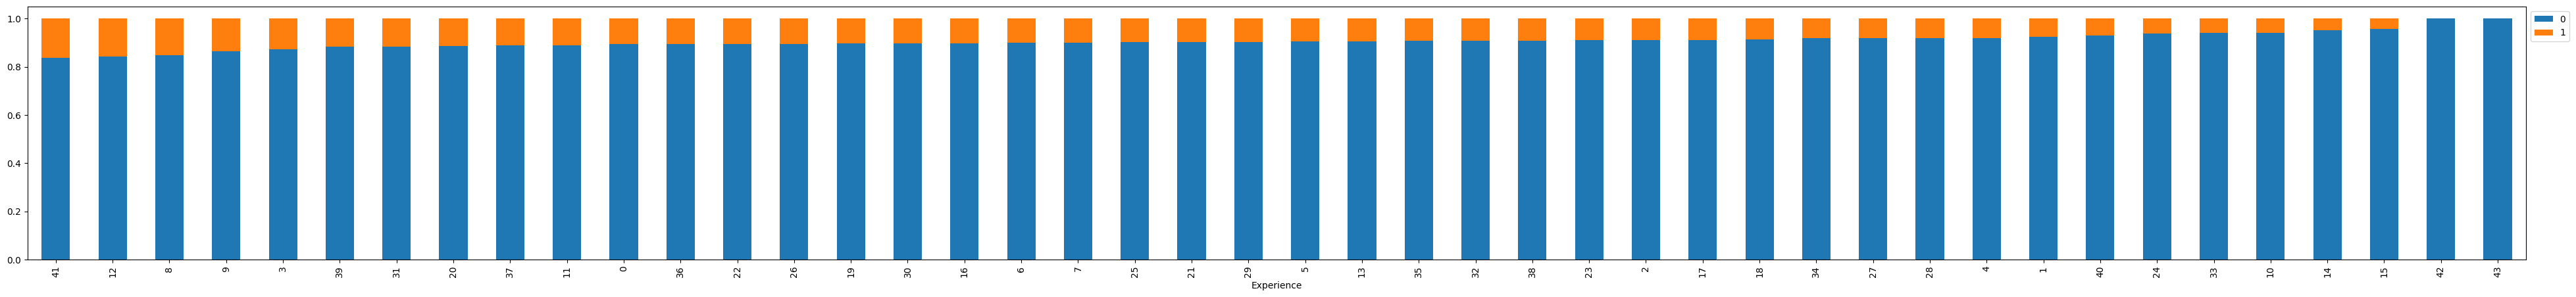

In [ ]:
stacked_barplot(data, "Experience", "Personal_Loan")

Personal loan vs Income

Personal_Loan     0    1   All
Income                        
All            4520  480  5000
130               8   11    19
182               2   11    13
158               8   10    18
135               8   10    18
179               8    9    17
141              15    9    24
154              12    9    21
123               9    9    18
184               3    9    12
142               7    8    15
131              11    8    19
129              15    8    23
172               3    8    11
173               5    8    13
170               4    8    12
180              10    8    18
115              19    8    27
125              16    7    23
164               6    7    13
188               3    7    10
83               67    7    74
114              23    7    30
161               9    7    16
122              17    7    24
133               8    7    15
132              11    7    18
191               6    7    13
134              13    7    20
111              15    7    22
190     

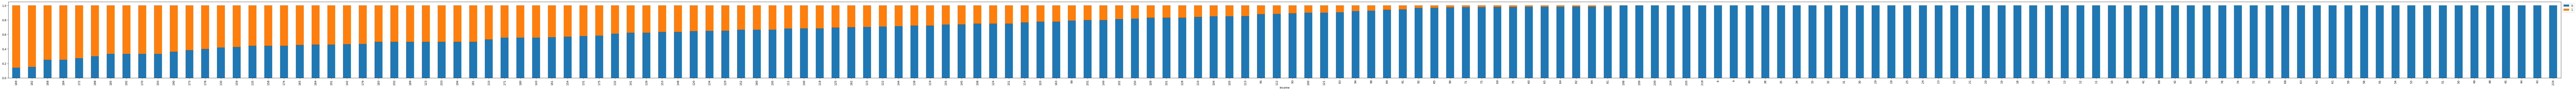

In [ ]:
stacked_barplot(data, "Income", "Personal_Loan")

Personal Loan vs Zip Code

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


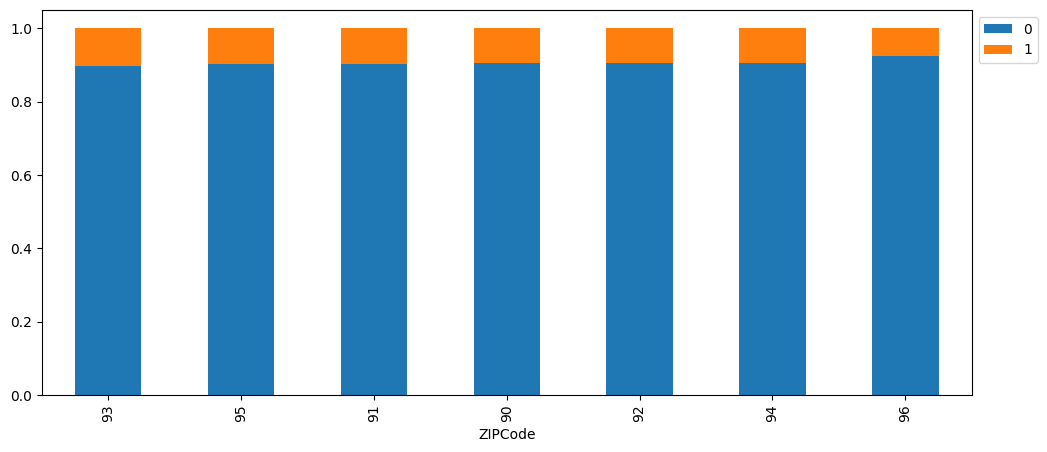

In [ ]:
stacked_barplot(data, "ZIPCode", "Personal_Loan")

Personal vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


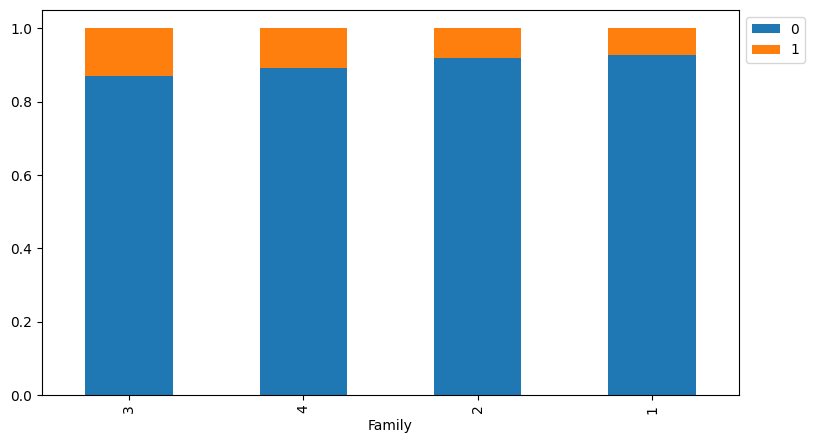

In [ ]:
stacked_barplot(data, "Family", "Personal_Loan")

Personal Loan vs Credit Card Average

Personal_Loan     0    1   All
CCAvg                         
All            4520  480  5000
3.0              34   19    53
4.1               9   13    22
3.4              26   13    39
3.1               8   12    20
4.2               0   11    11
5.4               8   10    18
6.5               8   10    18
3.8              33   10    43
3.6              17   10    27
3.3              35   10    45
5.0               9    9    18
3.9              18    9    27
2.9              45    9    54
2.6              79    8    87
6.0              18    8    26
4.4               9    8    17
4.3              18    8    26
0.2             196    8   204
0.5             155    8   163
4.7              17    7    24
5.2               9    7    16
1.3             121    7   128
2.7              51    7    58
3.7              18    7    25
1.1              77    7    84
5.6               0    7     7
4.0              26    7    33
2.2             123    7   130
4.8               0    7     7
5.1     

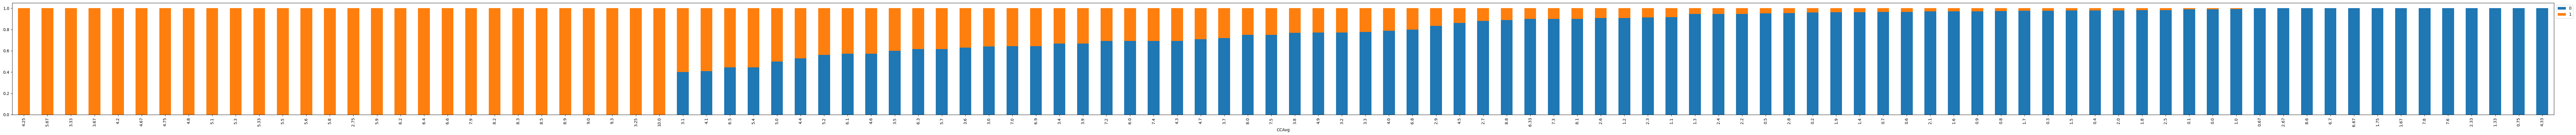

In [ ]:
stacked_barplot(data, "CCAvg", "Personal_Loan")

Personal Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


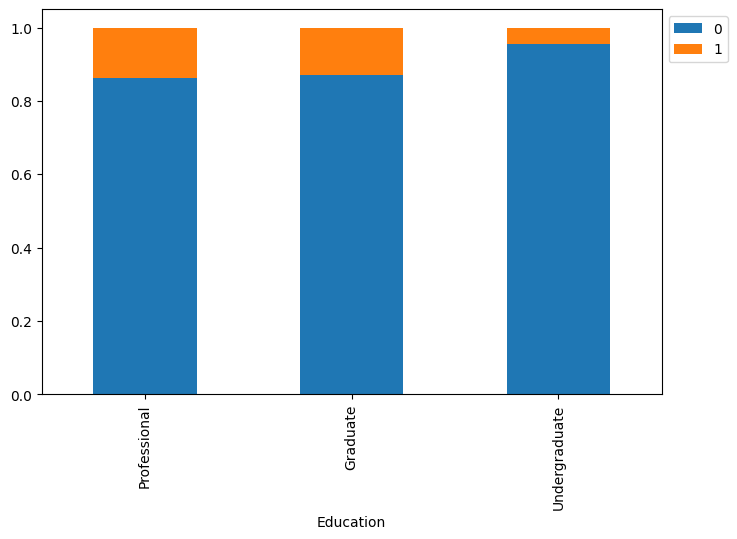

In [ ]:
stacked_barplot(data,"Education", "Personal_Loan")

Personal Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


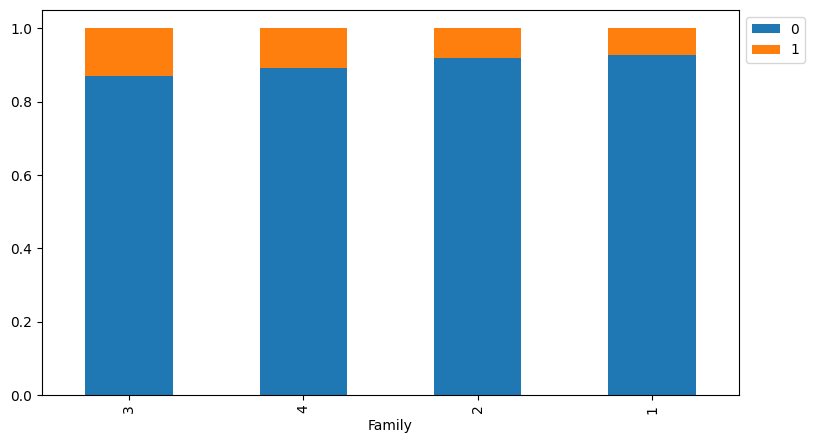

In [ ]:
stacked_barplot(data,"Family", "Personal_Loan")

Personal Loan vs Securities Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


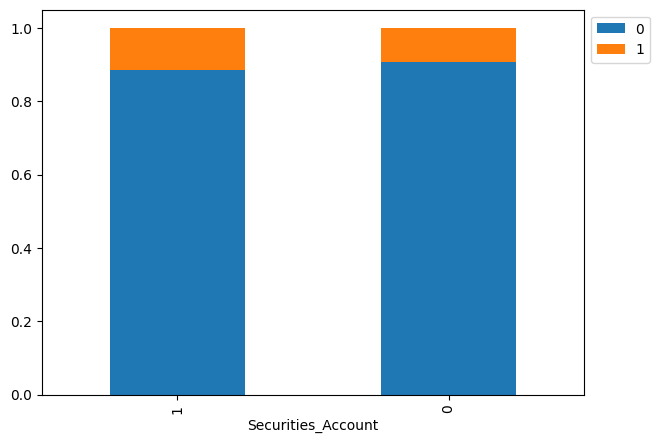

In [ ]:
stacked_barplot(data,"Securities_Account", "Personal_Loan")

Personal Loan Vs CD Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


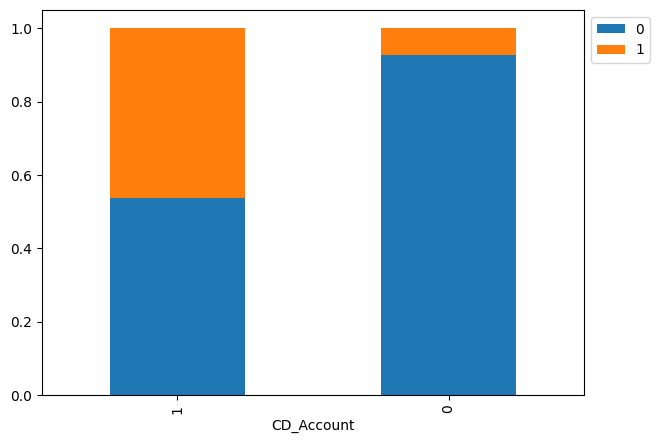

In [ ]:
stacked_barplot(data,"CD_Account", "Personal_Loan")

Personal Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


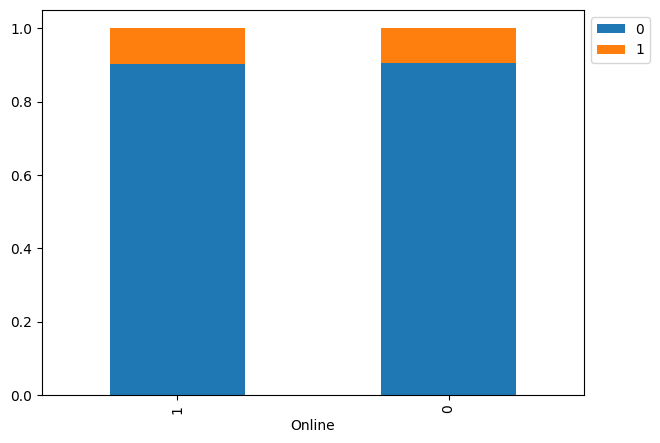

In [ ]:
stacked_barplot(data,"Online", "Personal_Loan")

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


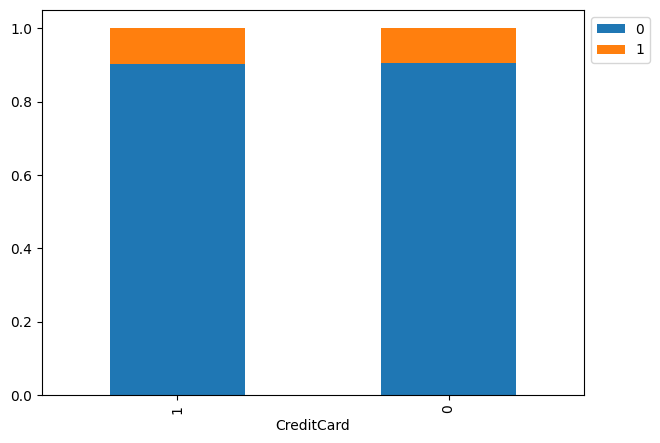

In [ ]:
stacked_barplot(data,"CreditCard", "Personal_Loan")

#5. Model Building and Outlier Detection

Code for Model Building

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Separating dependent and independent variables creating dummy variables and separating data into training and testing data

In [ ]:
# Separate independent and dependent variable
X = data.drop(["Personal_Loan","Experience"], axis=1)
Y = data["Personal_Loan"]

In [ ]:
# Complete the code to apply dummies on ZIPCode and Education
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Complete the code to split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# **Outlier Detection**
  


A. Reducing Outliers by Restricting Data to the Inter-Quartile Range

In [ ]:
# Separate independent and dependent variable
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

In [ ]:
Q1 = data.quantile(0.25)  # the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)  #the 75th percentile and 75th percentile.

IQR = Q3 - Q1               # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [ ]:
((data.select_dtypes(include=["float64", "int64"]) < lower)
    |(data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

Model Building

Separating Training and test data

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


In [ ]:
print("Shape of Training set : ", X_train.shape)          # Complete the code to get the shape of train data
print("Shape of test set : ", X_test.shape)           # Complete the code to get the shape of test data
print("Percentage of classes in training set:")
print(X_train.value_counts(normalize=True))              # Complete the code to get the value counts of y train data
print("Percentage of classes in test set:")
print(X_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Age  Income  Family  CCAvg  Mortgage  Securities_Account  CD_Account  Online  CreditCard  ZIPCode_91  ZIPCode_92  ZIPCode_93  ZIPCode_94  ZIPCode_95  ZIPCode_96  Education_Professional  Education_Undergraduate
23   12      4       1.0    0         1                   0           0       1           0           0           0           0           1           0           0                       1                          0.000286
52   95      1       0.3    0         0                   0           1       0           0           1           0           0           0           0           0                       1                          0.000286
     79      1       2.7    0         0                   0           1       1           0           0           0           1           0           0           0                       0                          0.000286
             3   

### Model Building

A. Interquartile Range Oulier Handling Model

In [ ]:
# Initialize the Decision Tree Classifier

X_train = X_train.astype(np.float32)
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Training Confusion Matrix and Performance

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_sklearn(model, X_train, y_train)

NameError: name 'confusion_matrix_sklearn' is not defined

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


Testing Confusion Matrix and Performance

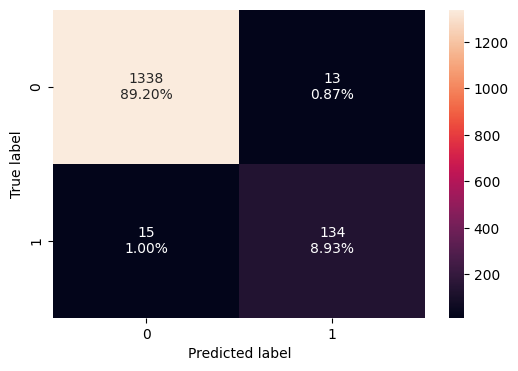

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)  # Complete the code to get the confusion matrix for test data

In [ ]:
# code to get the model formance on test data
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.981333,0.899329,0.911565,0.905405


Decision Tree

In [ ]:
#Decision Tree Features
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Professional', 'Education_Undergraduate']


Visualizing the Decision Tree

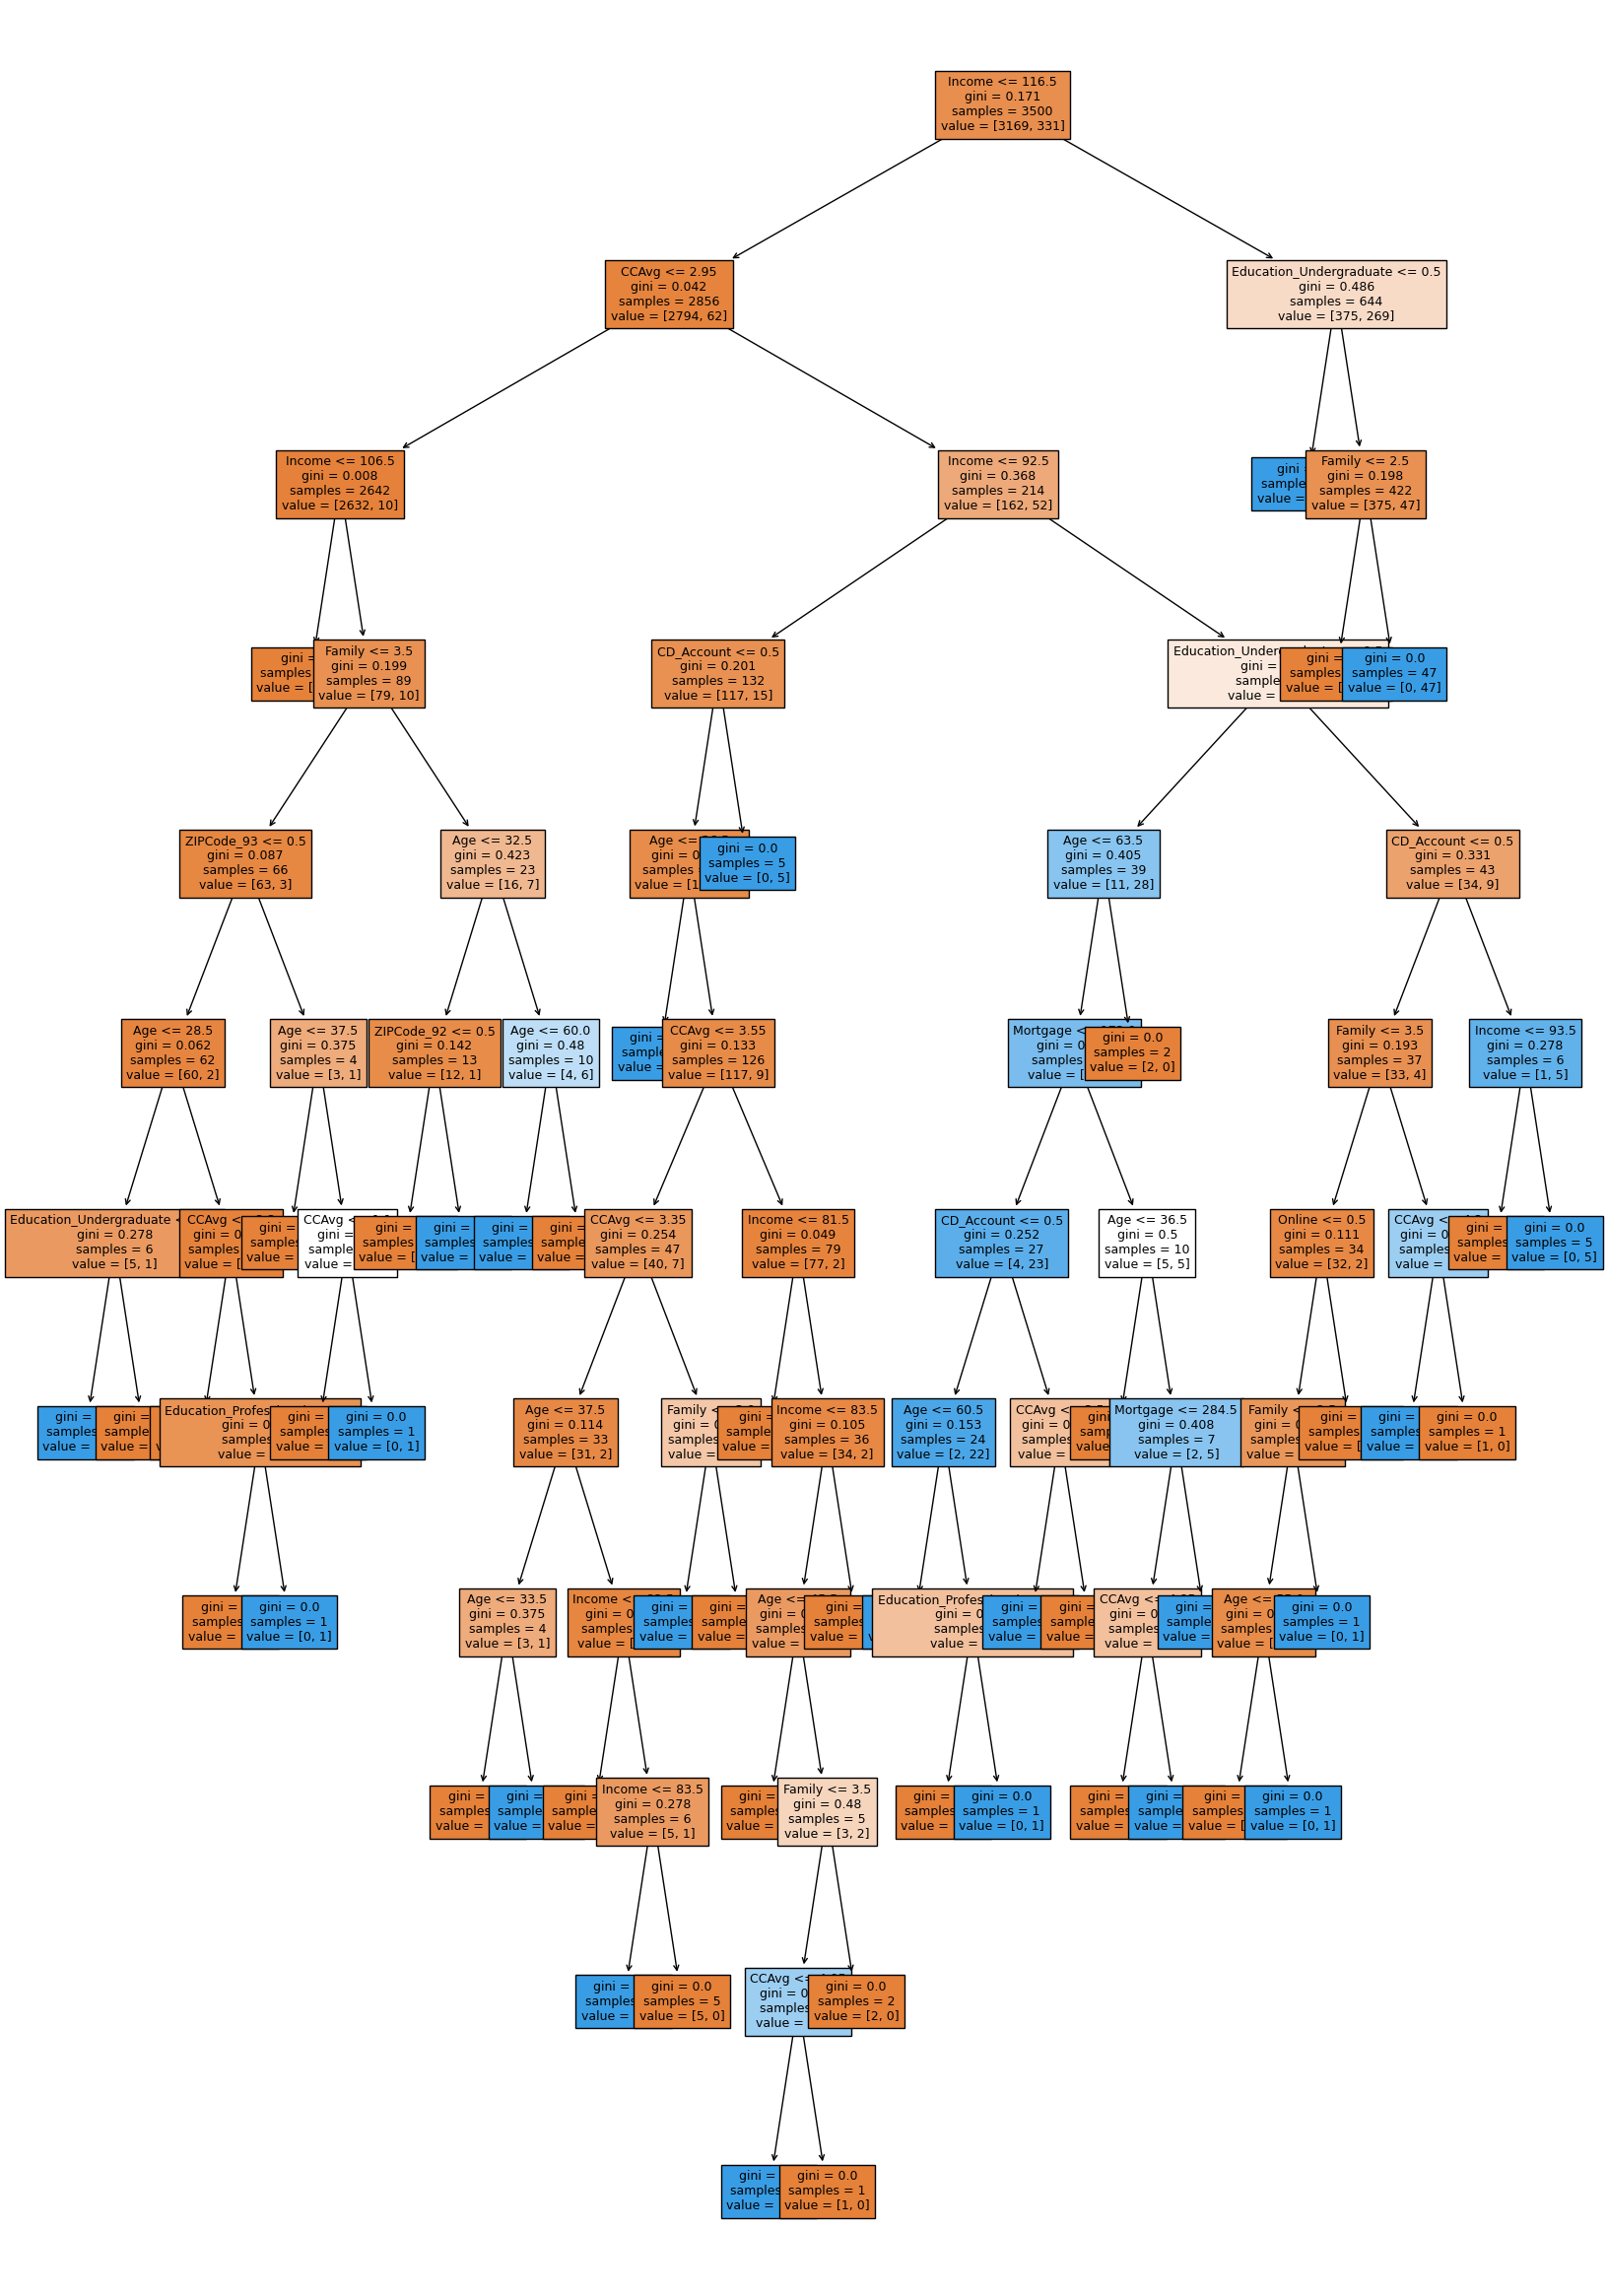

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

Rules for Decision Tree

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93

Important Features of training set by List and Graphically

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.403732
Income                   0.304761
Family                   0.161717
CCAvg                    0.053107
Age                      0.036035
CD_Account               0.025711
Mortgage                 0.005557
Education_Professional   0.005144
ZIPCode_92               0.003080
ZIPCode_93               0.000594
Online                   0.000561
Securities_Account       0.000000
ZIPCode_91               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
CreditCard               0.000000


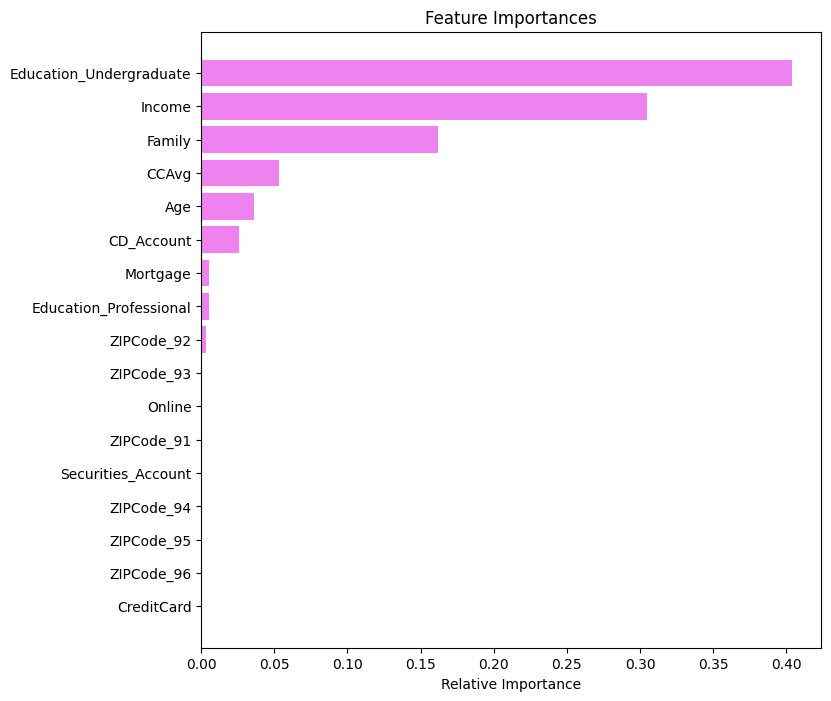

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Model performance on Test set

## B. Skewed Data Log Normalized Model

Normally distributed data would have skewness close to zero. CD_Account, Securities_Account, Mortgage, CCAvg,Credit Card,and Income are heavily positively skewed. The skewed data can be normalized to reduce overfitting. The new values for normalized data differences in the distribution of the normalized versus uncorrected data can be shown graphically below.
Categorical skewed data can be resolved using interquartile ranges.

Based on the above EDA Income, Credit Card Average, and  Mortgage, are skewed strongly to the right.

In [ ]:
## Bassed Graphical EDA the Categories are distributed as follows

##Age ,       ,Evenly
## Experience. Slightly Right
##Income ,,Strongly Right
##ZIPCode ,,Mildly Left
##Family,,Weakly Right
##CCAvg,,Strongly Right
##Education ,,Weakly Left
##Mortgage ,,Strongly Right
##CD_Account ,,Strongly Right
##Online,,Strongly Left
##CreditCard,,Strongly Right

#copying data base
df_2=data.copy()

## Code for detecting Skewness
df_2.skew().sort_values(ascending=False)


Mortgage      2.104002
CCAvg         1.598443
Income        0.841339
Family        0.155221
Experience   -0.010038
Age          -0.029341
dtype: float64

In [ ]:
#normalizing the most skewed data

df_2 = data[['Mortgage','CCAvg']].apply(lambda x: np.log(x))

In [ ]:
#confirming that skewness is normalized
df_2.skew().sort_values(ascending=False)

Mortgage   NaN
CCAvg      NaN
dtype: float64

Log Normalized Model

In [ ]:
# Choose the type of classifier.
estimator_3 = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator_3, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator_3 = grid_obj.best_estimator_

estimator_3.fit( X_train, y_train) ## Complete the code to fit model on train data

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1)

Training of Log Normalized Data Confusion Matrix and Performance

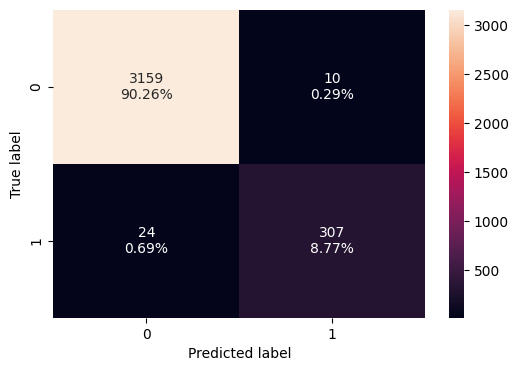

In [ ]:
confusion_matrix_sklearn(estimator_3, X_train, y_train) ##  create confusion matrix for training data

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator_3, X_train, y_train) ## check performance on train data
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.990286,0.927492,0.968454,0.947531


Testing of Log Normalized Data Model Confusion Matrix and Performance

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator_3, X_test, y_test) ## check performance on test data
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.98,0.865772,0.928058,0.895833


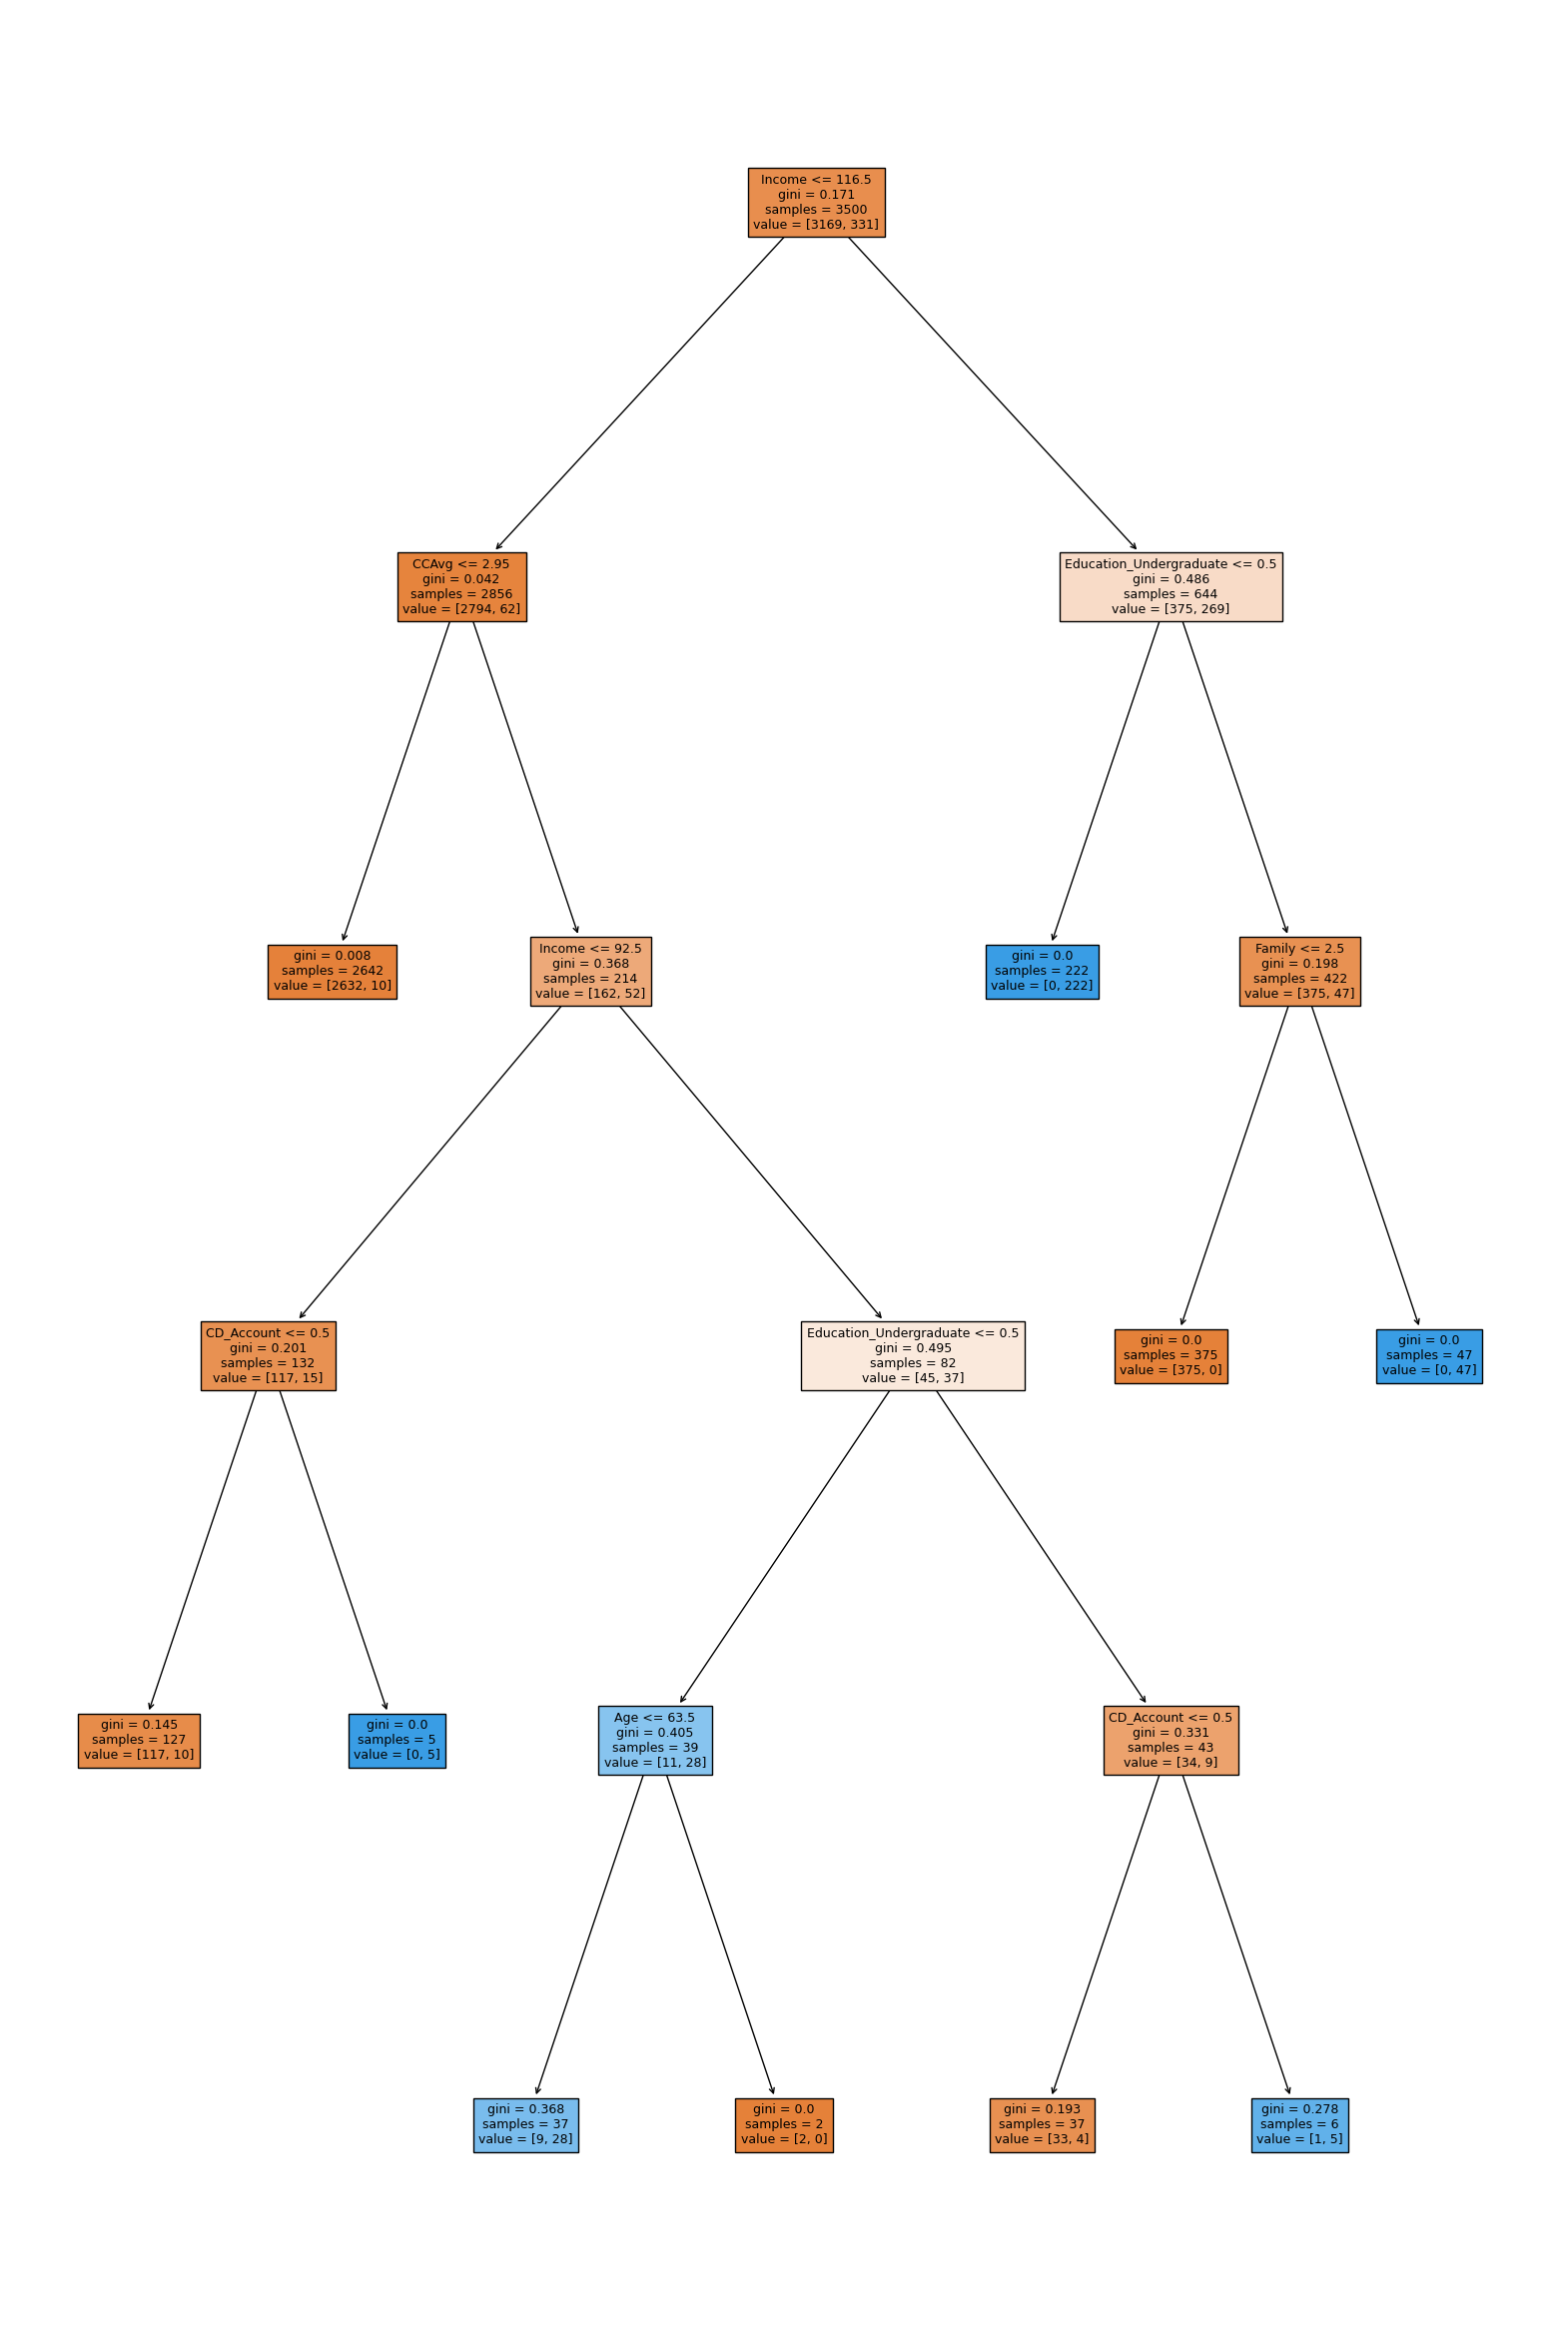

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    estimator_3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

Rules for Log Normalized Data Decision Tree

In [ ]:
print(tree.export_text(estimator_3, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|--- Income >  116.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.

Graphical Features Representation of Log Normalized Model

Prepruning Model "estimator" Standard Parameters Given in Help Session


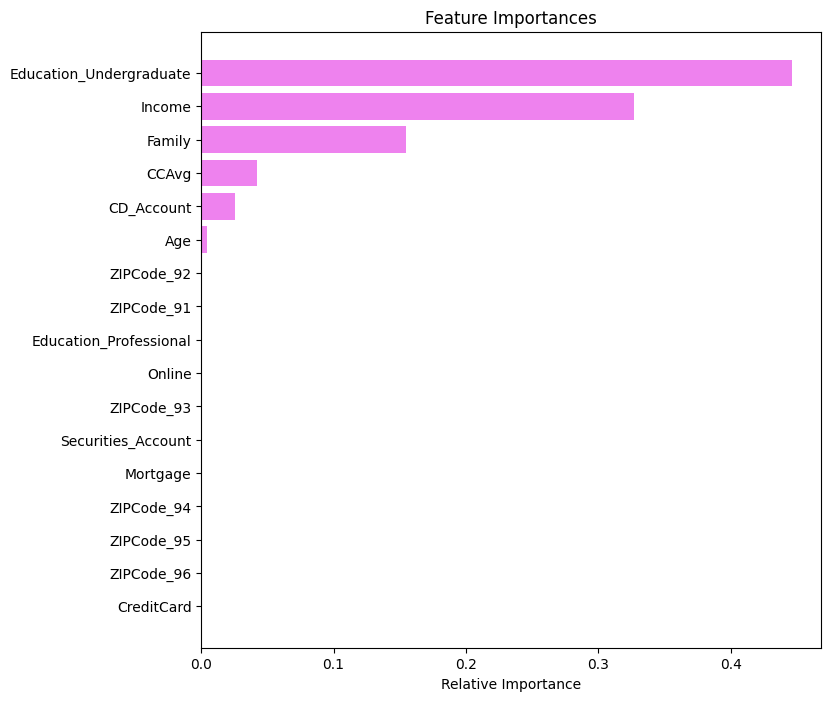

In [ ]:
importances = estimator_3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# **5.C. Using Entropy instead of Gini with GridsearCV optimized parameters**

GridSearch CV Optimized Parameters Modeling

In [ ]:
data_1=data.copy()
data_1.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.134600,73.774200,2.396400,1.937938,56.498800
std,11.463166,11.415189,46.033729,1.147663,1.747659,101.713802
min,23.000000,0.000000,8.000000,1.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000


Creating Pipeline to Preprune decision tree

In [ ]:
std_slc = StandardScaler()

In [ ]:
pca = decomposition.PCA()

In [ ]:
dec_tree = DecisionTreeClassifier()

In [ ]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

define the parameters that we want to optimise for these three objects.

In [ ]:
#optimizing principal components
n_components = list(range(1,X.shape[1]+1,1))

'criterion' and 'max_depth' to be optimised by GridSearchCV. GridSearchCV will select the best value of the two parameters

In [ ]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

create a dictionary to set all the parameter options

In [ ]:
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

Making  clf_GS an object for GridSearchCV and fitting the dataset  X and y

In [ ]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17]})

The values of hyperparameters as a result of GridSearchCV DecisionTreeClassifier.

In [ ]:
    print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
    print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
    print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
    print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 8
Best Number Of Components: 16

DecisionTreeClassifier(criterion='entropy', max_depth=8)


Modeling using  GridsearchCV parameters

Training Confusion Matrix and performance of GridsearchCV Derived Parameters

In [ ]:
predictors = X_train
y_pred = clf_GS.predict(predictors)

predictors = X_test
y_pred = clf_GS.predict(predictors)

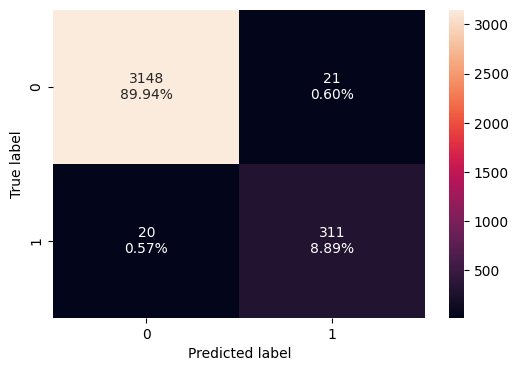

In [ ]:
confusion_matrix_sklearn(clf_GS,X_train, y_train)

In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn(clf_GS,X_train, y_train) ##  check performance on post train data
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.988286,0.939577,0.936747,0.93816


Testing Confusion Matrix and performance of GridsearchCV Derived Parameters

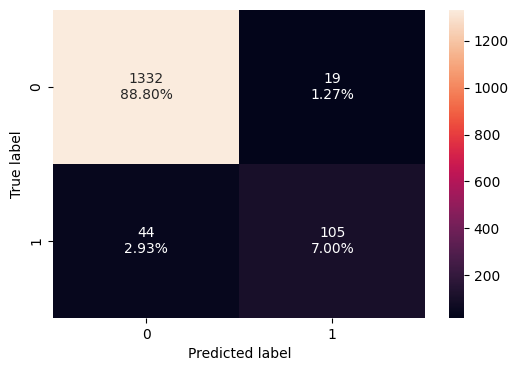

In [ ]:
confusion_matrix_sklearn(clf_GS,X_test, y_test)

In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn(clf_GS,X_test, y_test) ##  check performance on post train data
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.958,0.704698,0.846774,0.769231


'GridSearchCV' object has no attribute 'tree_' to display a graphical or "rule-based' decision tree

### Model Performance Improvement

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

estimator.fit( X_train, y_train) ## Complete the code to fit model on train data

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1)

## 6.  Pre-Pruning Decision Tree

Training of Pre-Pruning  Data Confusion Matrix and Performance

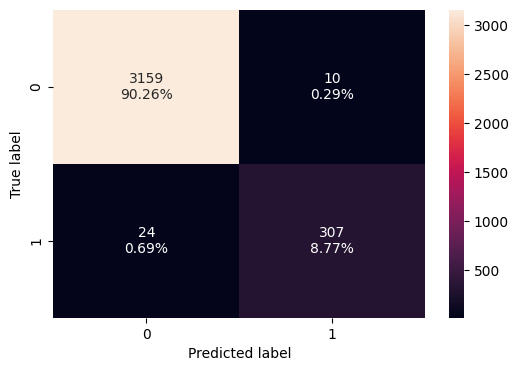

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train) ##  create confusion matrix for training data

In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator,X_train, y_train) ##  check performance on train data
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.990286,0.927492,0.968454,0.947531


Testing  of Pre-Pruning Data Confusion Matrix and Performance

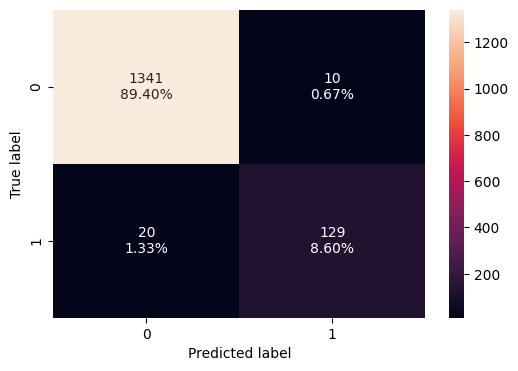

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator,X_test, y_test) ##  check performance on train data
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.98,0.865772,0.928058,0.895833


Prepruning tree visualization

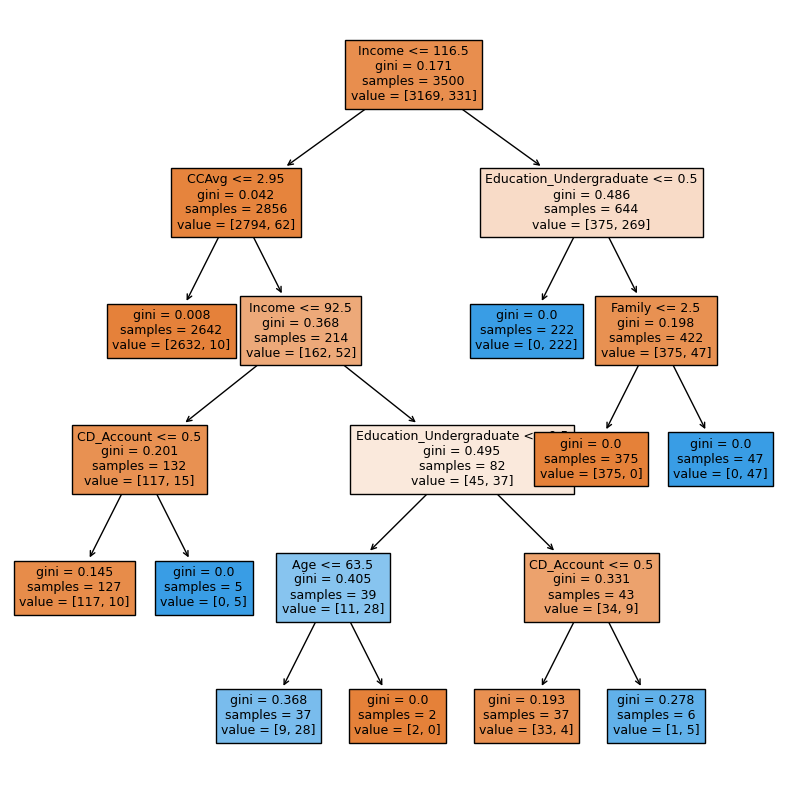

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

Rules for Pre-Pruning Decision Tree on Training Data

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))


|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|--- Income >  116.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.

Importance of Feature in Pre-Pruning Model

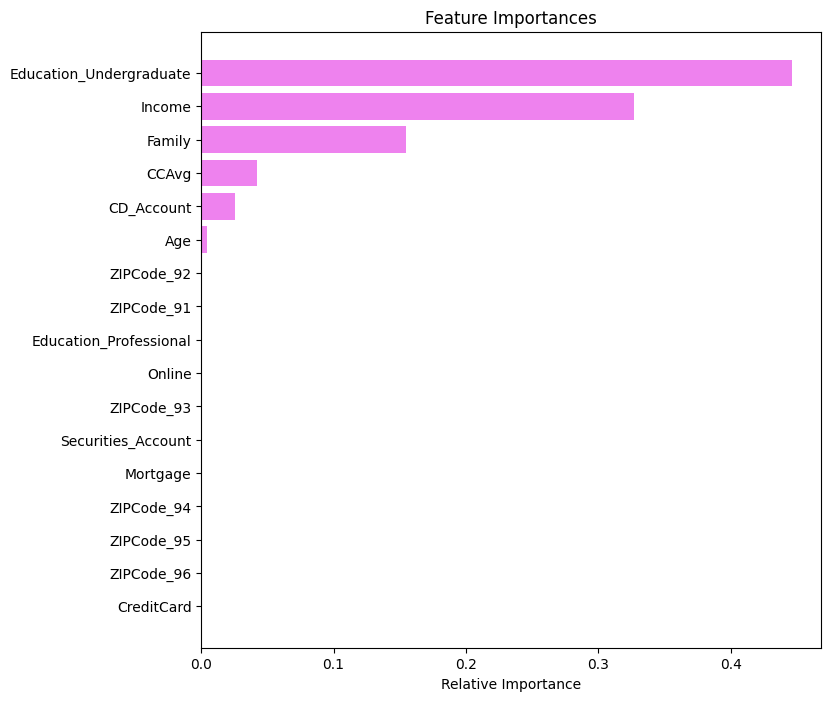

In [ ]:
mportances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Pre-Pruning performance on test data

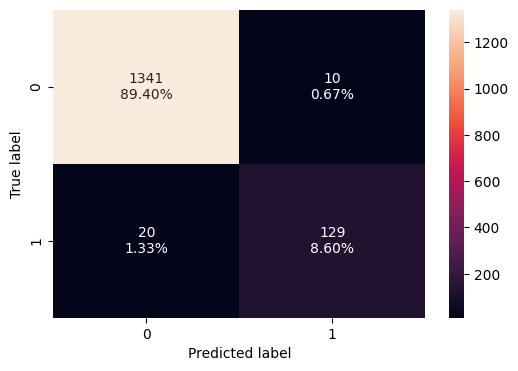

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_test, y_test) ## code to check performance on Pre-Pruning test data
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.98,0.865772,0.928058,0.895833


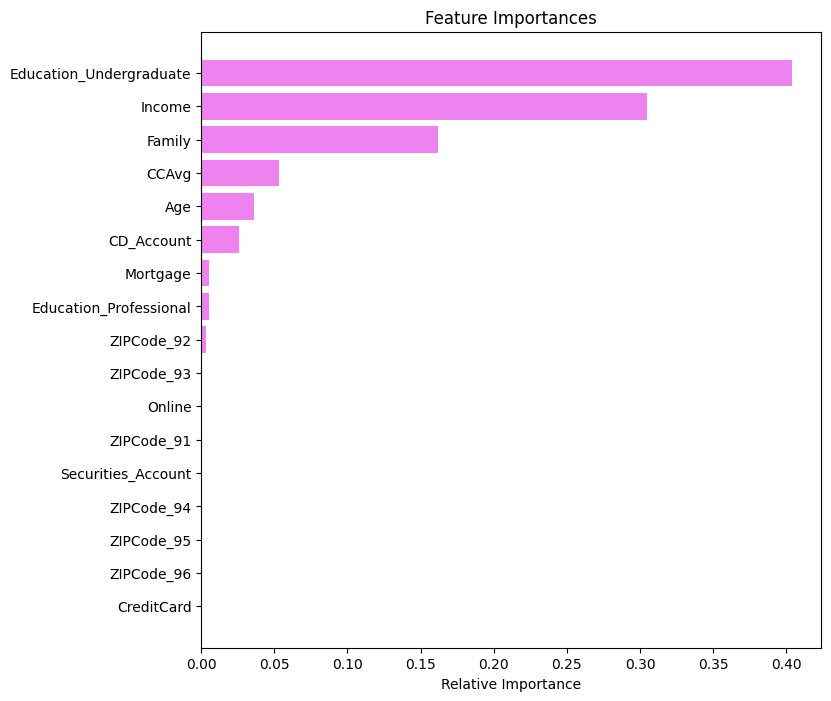

In [ ]:
mportances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Cost Complexcity Post Pruning "estimator_2"

Cost Complexicity is to minimized when prunning the tree.1

Alpha is the product of (error of the pruned tree minus the error in the original tree)/divided by the number of nodes that are reduced.
From the course text," "Due to the overfitting, the original tree may have high accuracy on the training data but it is not generalized. As we keep on pruning the tree, accuracy decreases on the training data but gradually it starts generalizing.
A high alpha will give a simpler tree but the performance will be low on the training set. On the other hand, a low alpha value will give high performance on the training set but it will not be generalized.2



In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000214,0.000429
2,0.000223,0.001542
3,0.000242,0.002750
4,0.000268,0.003824
5,0.000359,0.004900
6,0.000381,0.005280
7,0.000381,0.005661
8,0.000381,0.006042
9,0.000381,0.006423


Impurity vs Effective Alpha for Cost Complexity Post Pruning

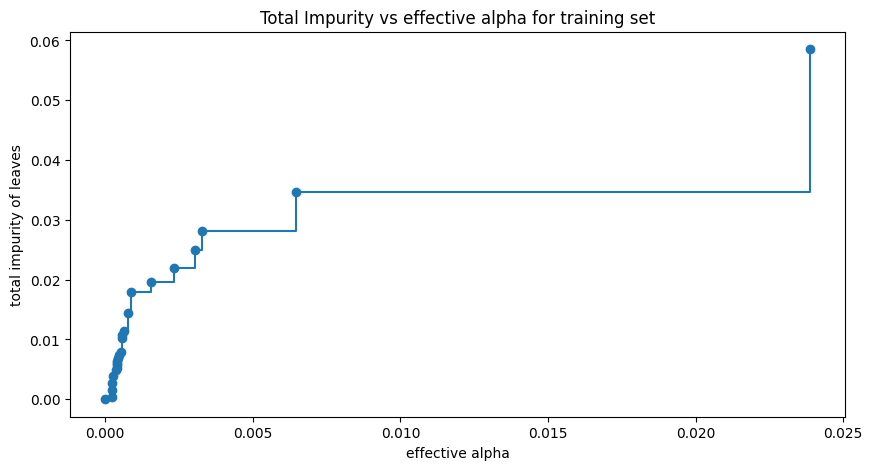

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     ##code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


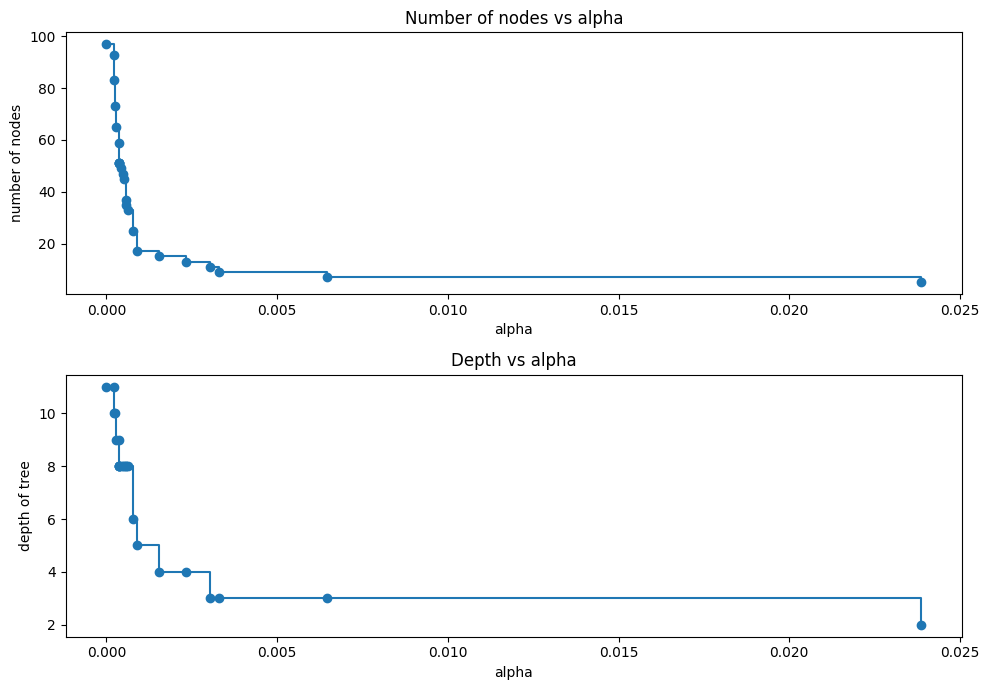

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

NameError: name 'clfs' is not defined

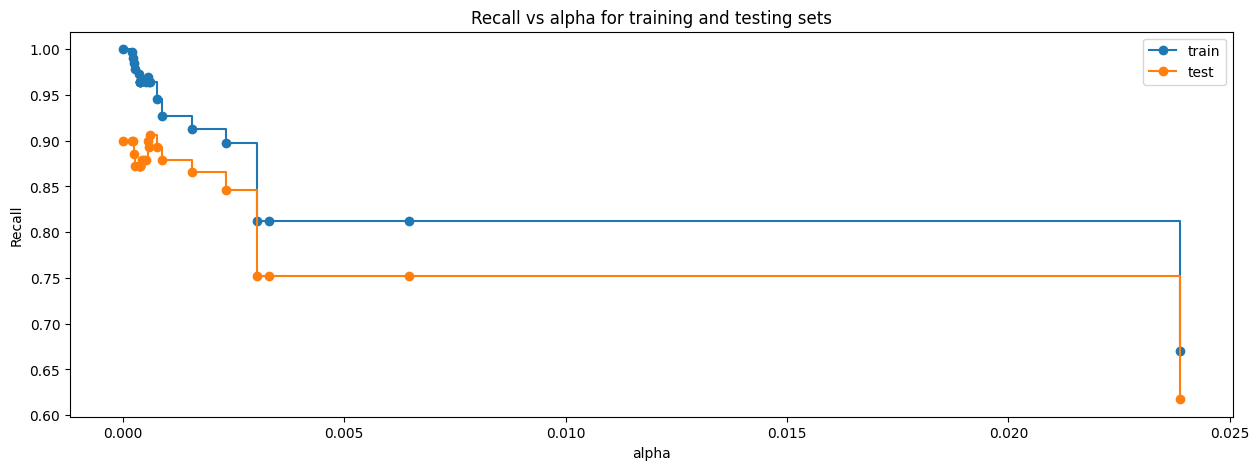

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

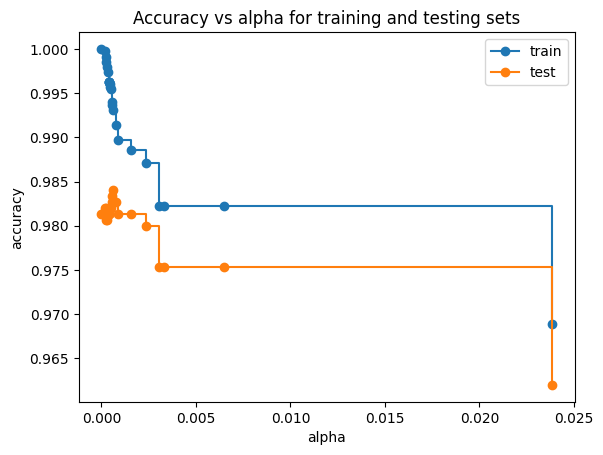

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Fitting the Best Model Based on Cost Complexcity

Modeling best alpha

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


In [ ]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=0.0006209286209286216, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

Checking Performance of estimator 2 cost complexity pruning

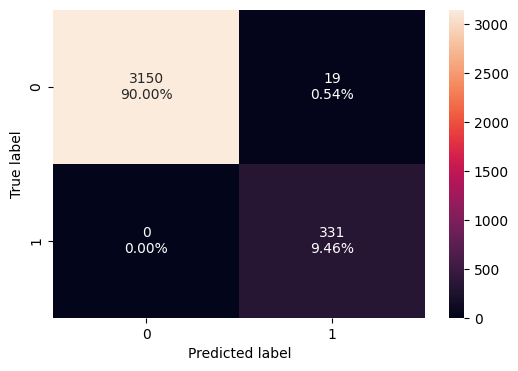

In [ ]:
confusion_matrix_sklearn(estimator_2,X_train, y_train)

In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2,X_train, y_train) ##  check performance on post train data
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.994571,1.0,0.945714,0.9721


In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2,X_test, y_test) ##  check performance on post train data
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.978667,0.885906,0.897959,0.891892


Visualizing The Cost Complexity Post Pruned Decision Tree

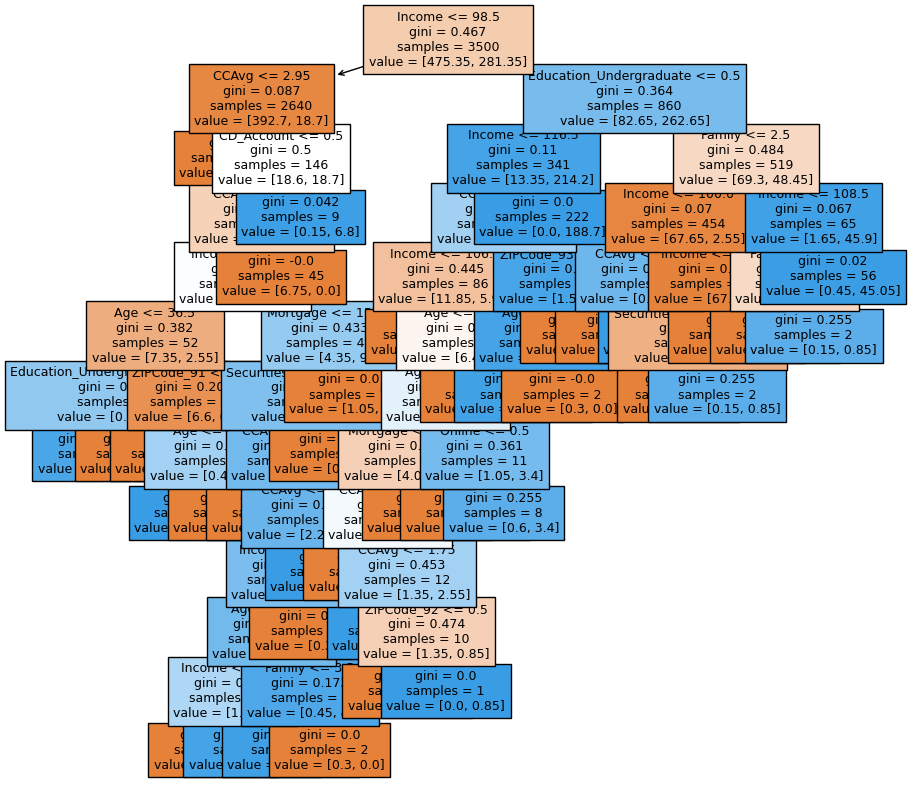

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

Rules for the Cost Complexcity Post Pruning Tree

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.15, 1.70] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |--- weights: [6.15, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_91 >  0.50
|   |   |   |   |   |   |   |--- Age <= 46.00
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- Age >  46.00
|   |   |   |   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- Mortgage <=

Importance of Features in Cost Complexity Post Pruning

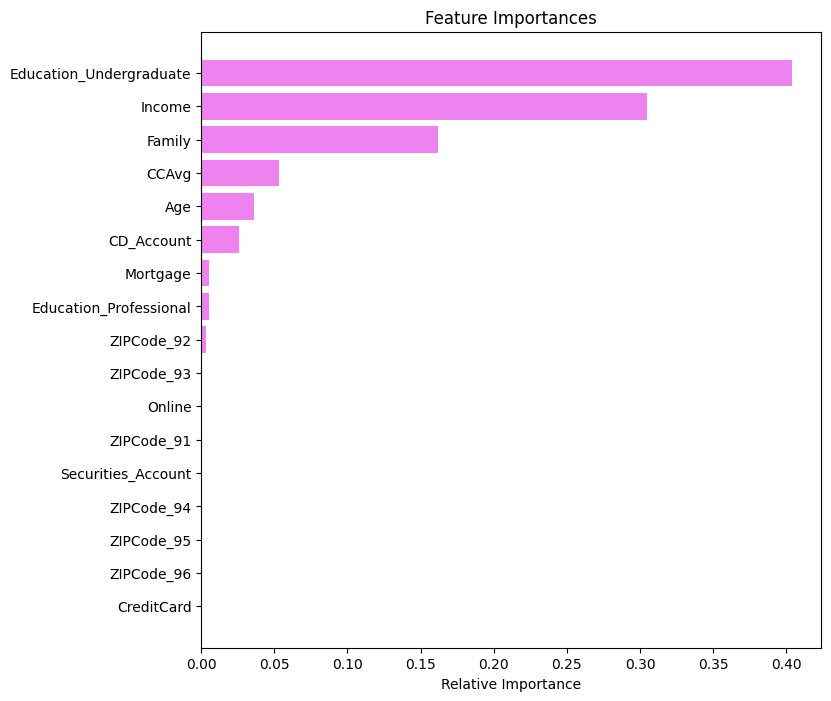

In [ ]:
mportances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Comparison and Final Model Selection

Maximizing Recall = True Positives / (True Positives + False Negatives) or minimizing false negatives is the most important factor in deciding which model the bank should use when choosing potential personal loan customers to market to. A higher recall in the testing data would be more indicative a model that is more generalized than the recall parameter of the training data

Recall of the intial test Model    

**0.899329**

Recall of the Normalized data test model

**0.865772	**

Recal of the Gridsearch CV Optimized test data model

**0.704698**


Recal of the Pre-Pruning test Model        

**0.865772**

Recall of the Cost Complexity test Model        

**0.885906**

The cost complexity model is the most likely model to be used by bank employees to predict the likeliness of a customer to purchase a personal loan.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

1.   Bank employees have the highest chance of selling personal loans to high income individuals with an undergraduate education and a family.
2.The above individuals with a credit card balance and safe investments like a CD accounts are most likely to purchase loans.



___

Citations
1. 11.8.2 - Minimal Cost-Complexity Pruning | STAT 508
online.stat.psu.edu

2. https://olympus.mygreatlearning.com/courses/98691/pages/post-pruning-summary?module_item_id=5137183

In [ ]:
!jupyter nbconvert --to html_.ipynb

[NbConvertApp] WARNING | pattern 'Final_MLS2_21_.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
